In [126]:
import json
import networkx as nx
import pycountry
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.basemap import Basemap

In [283]:
def normalize_country(country):
    if country is None:
        return None

    if len(country) == 2:
        new_country = pycountry.countries.get(alpha_2 = country)

        return new_country.alpha_3

    if len(country) == 3:
        new_country = pycountry.countries.get(alpha_3 = country)

        return new_country.alpha_3

    raise Exception("Hmm")

def get_graph(graph_json_path, only_direct=False):
    graph_json = json.load(open(graph_json_path))
    G = nx.DiGraph()

    edges_to_add = []
    for from_node, neighbours in graph_json["adjacency"].items():
        for to_node, data in neighbours.items():
            if only_direct and not data.get("direct", False):
                continue
            edges_to_add.append((from_node, to_node, { "weight": data.get("duration"), "direct": data.get("direct") }))

    nodes_to_add = []
    for node_id, node_data in graph_json["nodes"].items():
        node_attrs = {
            "name": node_data["name"],
            "position": node_data.get("position"),
            "country": normalize_country(node_data.get("country"))
        }
        nodes_to_add.append((node_id, node_attrs))

    G.add_nodes_from(nodes_to_add)
    G.add_edges_from(edges_to_add)

    return G

def filter_country(G, country):
    G_copy = G.copy()
    nodes_to_remove = []

    for node in G.nodes:
        if G.nodes[node]["country"] != country:
            nodes_to_remove.append(node)

    G_copy.remove_nodes_from(nodes_to_remove)

    return G_copy

def get_sorted_nodes(G, statistic):
    nodes_with_statistic = list([(stat, node, G.nodes[node]) for node, stat in statistic.items()])
    return sorted(nodes_with_statistic, reverse=True)

In [279]:
G = get_graph("/Users/vhotmar/Projects/school/mff/NAIL116/project/scrap/graph.json", only_direct=False)
G_direct = get_graph("/Users/vhotmar/Projects/school/mff/NAIL116/project/scrap/graph.json", only_direct=True)

In [280]:
print(f"Edges count: {len(G.edges)}, direct edges count {len(G_direct.edges)}")
print(f"Nodes count: {len(G.nodes)}, direct nodes count {len(G_direct.nodes)}")

Edges count: 1035303, direct edges count 83305
Nodes count: 35816, direct nodes count 35816


In [218]:
Counter([G.nodes[node]["country"] for node in G.nodes])

Counter({'DEU': 7665,
         'NLD': 412,
         'CHE': 2150,
         'FIN': 203,
         'RUS': 10,
         'ESP': 1032,
         'BLR': 3,
         'UKR': 64,
         'MDA': 2,
         'LTU': 2,
         'LVA': 3,
         'POL': 2624,
         None: 34,
         'BGR': 667,
         'SRB': 192,
         'ROU': 1331,
         'CZE': 2411,
         'HUN': 1173,
         'SVK': 716,
         'IRL': 1,
         'MNE': 48,
         'MKD': 17,
         'GBR': 2616,
         'PRT': 424,
         'BIH': 13,
         'HRV': 481,
         'GRC': 44,
         'SWE': 528,
         'NOR': 336,
         'TUR': 3,
         'SVN': 258,
         'AUT': 1340,
         'FRA': 5408,
         'LUX': 71,
         'LIE': 4,
         'ITA': 2447,
         'DNK': 468,
         'MCO': 2,
         'AND': 1,
         'BEL': 567})

In [282]:
G_cze = filter_country(G, "CZE")
G_direct_cze = filter_country(G_direct, "CZE")

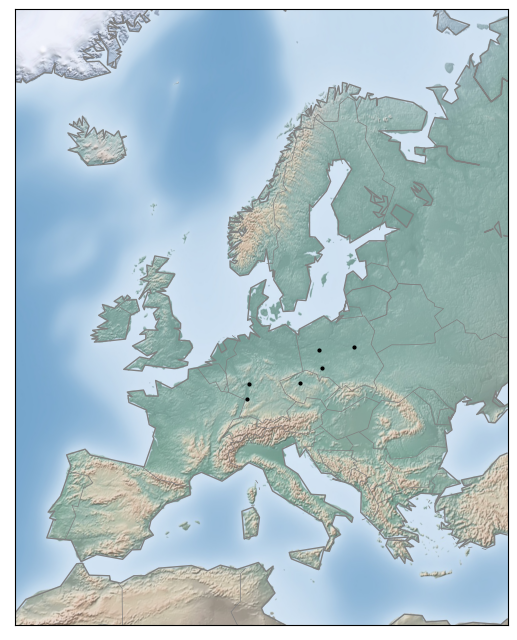

In [261]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            lat_0=55, lon_0=10,
            width=4E6, height=5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

#cze_nodes = list([(node, G.nodes[node]) for node in G.nodes if G.nodes[node]["country"] == "CZE"])
#to_plot_nodes = list([(node, data) for node, data in cze_nodes if G.degree(node) > 250])
to_plot_nodes = list([(n, G.nodes[n]) for n in G.nodes() if G.degree(n) > 900])

for node, data in to_plot_nodes:
    x, y = m(data["position"]["long"], data["position"]["lat"])
    plt.plot(x, y, 'ok', markersize=2)

# Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)
#plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' Seattle', fontsize=12);

In [286]:
h, a = nx.hits(G)
h_cze, a_cze = nx.hits(G_cze)
h_direct, a_direct = nx.hits(G_direct)
h_direct_cze, a_direct_cze = nx.hits(G_direct_cze)

In [292]:
get_sorted_nodes(G_direct, h_direct)[:10]

[(0.037659218528313984,
  '8700158',
  {'name': 'Briancon',
   'position': {'lat': 44.890017, 'long': 6.632826},
   'country': 'FRA'}),
 (0.036972937761547385,
  '8700171',
  {'name': 'Nice Ville',
   'position': {'lat': 43.704825, 'long': 7.261765},
   'country': 'FRA'}),
 (0.03686958522863097,
  '8702473',
  {'name': "L'Argentière les Ecrins",
   'position': {'lat': 44.790947, 'long': 6.556193},
   'country': 'FRA'}),
 (0.0361333362461512,
  '8702549',
  {'name': 'Montdauphin-Guillestre',
   'position': {'lat': 44.67459, 'long': 6.615512},
   'country': 'FRA'}),
 (0.03600036872819511,
  '8700146',
  {'name': 'Antibes',
   'position': {'lat': 43.585682, 'long': 7.119466},
   'country': 'FRA'}),
 (0.03525620683416769,
  '8700144',
  {'name': 'Cannes',
   'position': {'lat': 43.554193, 'long': 7.020324},
   'country': 'FRA'}),
 (0.03513339439866644,
  '8702506',
  {'name': 'Embrun',
   'position': {'lat': 44.567178, 'long': 6.496864},
   'country': 'FRA'}),
 (0.03389599480271358,
  '870

In [293]:
pagerank, pagerank_direct = nx.pagerank(G), nx.pagerank(G_direct)
pagerank_cze, pagerank_direct_cze = nx.pagerank(G_cze), nx.pagerank(G_direct_cze)

In [295]:
get_sorted_nodes(G_direct, pagerank_direct)[:10]

[(0.0015927119803167131,
  '8100108',
  {'name': 'Innsbruck Hbf',
   'position': {'lat': 47.263331, 'long': 11.400506},
   'country': 'AUT'}),
 (0.0011660814501107714,
  '8700003',
  {'name': 'Les Aubrais - Orléans',
   'position': {'lat': 47.926726, 'long': 1.906288},
   'country': 'FRA'}),
 (0.0010178032223580968,
  '8000128',
  {'name': 'Göttingen',
   'position': {'lat': 51.536758, 'long': 9.926257},
   'country': 'DEU'}),
 (0.0009346444530599775,
  '8002549',
  {'name': 'Hamburg Hbf',
   'position': {'lat': 53.553533, 'long': 10.00636},
   'country': 'DEU'}),
 (0.000827761145125337,
  '8000152',
  {'name': 'Hannover Hbf',
   'position': {'lat': 52.377079, 'long': 9.741763},
   'country': 'DEU'}),
 (0.0007947717897944298,
  '8700014',
  {'name': 'Paris Nord',
   'position': {'lat': 48.880886, 'long': 2.354931},
   'country': 'FRA'}),
 (0.0007726938212739864,
  '8700011',
  {'name': 'Paris Est',
   'position': {'lat': 48.876976, 'long': 2.35912},
   'country': 'FRA'}),
 (0.000704908

In [298]:
closeness_centrality_cze, closeness_centrality_direct_cze = nx.closeness_centrality(G_cze), nx.closeness_centrality(G_direct_cze)

In [299]:
get_sorted_nodes(G_direct_cze, closeness_centrality_direct_cze)[:10]

[(0.12679124698200497,
  '5400014',
  {'name': 'Praha hl.n.',
   'position': {'lat': 50.083058, 'long': 14.436038},
   'country': 'CZE'}),
 (0.12436384595490851,
  '5400022',
  {'name': 'Kolin(CZ)',
   'position': {'lat': 50.025437, 'long': 15.214279},
   'country': 'CZE'}),
 (0.12321063010200735,
  '5400130',
  {'name': 'Praha-Liben',
   'position': {'lat': 50.100686, 'long': 14.502297},
   'country': 'CZE'}),
 (0.12299031026275901,
  '5400161',
  {'name': 'Pardubice hl.n.',
   'position': {'lat': 50.031739, 'long': 15.756212},
   'country': 'CZE'}),
 (0.12135009907820557,
  '5400201',
  {'name': 'Praha-Holesovice',
   'position': {'lat': 50.110215, 'long': 14.440011},
   'country': 'CZE'}),
 (0.11735523457299642,
  '5400204',
  {'name': 'Praha-Smichov',
   'position': {'lat': 50.060945, 'long': 14.408153},
   'country': 'CZE'}),
 (0.11621218304110222,
  '5400021',
  {'name': 'Hradec Kralove hl.n.',
   'position': {'lat': 50.214445, 'long': 15.809868},
   'country': 'CZE'}),
 (0.11502

In [300]:
eigenvector_centrality, eigenvector_centrality_direct = nx.eigenvector_centrality_numpy(G), nx.eigenvector_centrality_numpy(G_direct)
eigenvector_centrality_cze, eigenvector_centrality_direct_cze = nx.eigenvector_centrality_numpy(G_cze), nx.eigenvector_centrality_numpy(G_direct_cze)

In [308]:
get_sorted_nodes(G, eigenvector_centrality)[:10]

[(0.1344574559470728,
  '5100066',
  {'name': 'Warszawa Wschodnia',
   'position': {'lat': 52.251544, 'long': 21.052332},
   'country': 'POL'}),
 (0.12623926269660965,
  '5100067',
  {'name': 'Warszawa Zachodnia',
   'position': {'lat': 52.219974, 'long': 20.965245},
   'country': 'POL'}),
 (0.12371479227779014,
  '5100028',
  {'name': 'Krakow Glowny',
   'position': {'lat': 50.067192, 'long': 19.947423},
   'country': 'POL'}),
 (0.11921396368438537,
  '5100069',
  {'name': 'Wroclaw Glowny',
   'position': {'lat': 51.098075, 'long': 17.037084},
   'country': 'POL'}),
 (0.11758748640505662,
  '5100081',
  {'name': 'Poznan Gl.',
   'position': {'lat': 52.401997, 'long': 16.910867},
   'country': 'POL'}),
 (0.11554911852554202,
  '5100020',
  {'name': 'Katowice',
   'position': {'lat': 50.257512, 'long': 19.017165},
   'country': 'POL'}),
 (0.10532338034143797,
  '5100065',
  {'name': 'Warszawa Centralna',
   'position': {'lat': 52.228864, 'long': 21.003233},
   'country': 'POL'}),
 (0.10

In [319]:
betweenes_centrality_cze, betweenes_centrality_direct_cze = nx.betweenness_centrality(G_cze), nx.betweenness_centrality(G_direct_cze)

In [320]:
get_sorted_nodes(G_cze, betweenes_centrality_cze)[:10]

[(0.3063753518684279,
  '5400014',
  {'name': 'Praha hl.n.',
   'position': {'lat': 50.083058, 'long': 14.436038},
   'country': 'CZE'}),
 (0.1100880320681579,
  '5400022',
  {'name': 'Kolin(CZ)',
   'position': {'lat': 50.025437, 'long': 15.214279},
   'country': 'CZE'}),
 (0.09623050569073989,
  '5400001',
  {'name': 'Brno hl.n.',
   'position': {'lat': 49.190537, 'long': 16.612776},
   'country': 'CZE'}),
 (0.08561188688149264,
  '5400012',
  {'name': 'Plzen hl.n.',
   'position': {'lat': 49.743167, 'long': 13.388246},
   'country': 'CZE'}),
 (0.07498789437619308,
  '5400161',
  {'name': 'Pardubice hl.n.',
   'position': {'lat': 50.031739, 'long': 15.756212},
   'country': 'CZE'}),
 (0.06159256787010047,
  '5400010',
  {'name': 'Olomouc hl.n.',
   'position': {'lat': 49.593128, 'long': 17.277932},
   'country': 'CZE'}),
 (0.0406636015162135,
  '5400198',
  {'name': 'Liberec',
   'position': {'lat': 50.761429, 'long': 15.045947},
   'country': 'CZE'}),
 (0.038872833342312486,
  '5400

In [318]:
list([G.nodes[node] for node in G_direct_cze["5400014"]]) # Přímé spojení z Prahy bez zastavení (neznamená, že neprojíždí jinými stanicemi, akorát v nich nestaví)

[{'name': 'Kolin(CZ)',
  'position': {'lat': 50.025437, 'long': 15.214279},
  'country': 'CZE'},
 {'name': 'Tabor',
  'position': {'lat': 49.414081, 'long': 14.677551},
  'country': 'CZE'},
 {'name': 'Praha-Liben',
  'position': {'lat': 50.100686, 'long': 14.502297},
  'country': 'CZE'},
 {'name': 'Pardubice hl.n.',
  'position': {'lat': 50.031739, 'long': 15.756212},
  'country': 'CZE'},
 {'name': 'Praha-Vysocany',
  'position': {'lat': 50.112318, 'long': 14.497497},
  'country': 'CZE'},
 {'name': 'Praha-Holesovice',
  'position': {'lat': 50.110215, 'long': 14.440011},
  'country': 'CZE'},
 {'name': 'Praha-Smichov',
  'position': {'lat': 50.060945, 'long': 14.408153},
  'country': 'CZE'},
 {'name': 'Praha-Vrsovice',
  'position': {'lat': 50.064666, 'long': 14.447832},
  'country': 'CZE'},
 {'name': 'Praha-Bubny',
  'position': {'lat': 50.102376, 'long': 14.438357},
  'country': 'CZE'},
 {'name': 'Praha-Smichov sev.n.',
  'position': {'lat': 50.063075, 'long': 14.406643},
  'country': 

In [321]:
list([G.nodes[node] for node in G_cze["5400014"]]) # Přímé spojení z Prahy

[{'name': 'Brno hl.n.',
  'position': {'lat': 49.190537, 'long': 16.612776},
  'country': 'CZE'},
 {'name': 'Ceska Trebova',
  'position': {'lat': 49.897323, 'long': 16.446808},
  'country': 'CZE'},
 {'name': 'Decin hl.n.',
  'position': {'lat': 50.773987, 'long': 14.201527},
  'country': 'CZE'},
 {'name': 'Cheb',
  'position': {'lat': 50.073494, 'long': 12.380699},
  'country': 'CZE'},
 {'name': 'Chomutov',
  'position': {'lat': 50.456911, 'long': 13.399312},
  'country': 'CZE'},
 {'name': 'Karlovy Vary',
  'position': {'lat': 50.235668, 'long': 12.866854},
  'country': 'CZE'},
 {'name': 'Marianske Lazne',
  'position': {'lat': 49.956967, 'long': 12.694629},
  'country': 'CZE'},
 {'name': 'Olomouc hl.n.',
  'position': {'lat': 49.593128, 'long': 17.277932},
  'country': 'CZE'},
 {'name': 'Plzen hl.n.',
  'position': {'lat': 49.743167, 'long': 13.388246},
  'country': 'CZE'},
 {'name': 'Prerov',
  'position': {'lat': 49.446352, 'long': 17.446175},
  'country': 'CZE'},
 {'name': 'Ceske 